# Random walks, stocks, volatility and diversification


## 1.
**Write a routine to generate an N-step random walk in d dimensions,
with each step uniformly distributed in the range (1/2, 1/2) in each
dimension.**

In [1]:
import numpy as np

def random_walk(N,d,max_step_size = 1/2,start = 0):
  #create array with single random steps
  step_array = np.random.uniform(-max_step_size,max_step_size,size=(N,d))

  #create array with all points of the random walk; sum therefore steps of the step_array
  random_walk_array = np.zeros((N,d))
  for j in range(0,d):
    random_walk_array[0][j] = step_array[0][j] + start
    for i in range(1,N):
      random_walk_array[i][j] = random_walk_array[i-1][j] + step_array[i][j]

  return(step_array,random_walk_array)

random_walk(10,1)

(array([[-0.39009175],
        [-0.11749854],
        [ 0.24069583],
        [ 0.29458108],
        [ 0.49623517],
        [-0.16517931],
        [-0.48802185],
        [ 0.47726076],
        [-0.32680049],
        [-0.3495157 ]]),
 array([[-0.39009175],
        [-0.50759029],
        [-0.26689445],
        [ 0.02768663],
        [ 0.5239218 ],
        [ 0.35874249],
        [-0.12927935],
        [ 0.34798141],
        [ 0.02118091],
        [-0.32833478]]))

**Plot $x_t$ versus t for a few 10, 000-step random walks.**

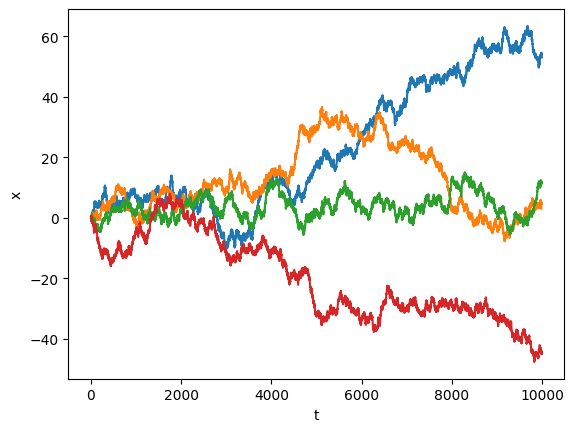

In [2]:
import matplotlib.pyplot as plt

result = random_walk(10000,4)

for i in range(4):
  plt.plot(result[1][:, i])

plt.ylabel("x")
plt.xlabel("t")
plt.show()

**Plot x versus y for a few two-dimensional random walks, with $N = 10$, $ 1000$, and $ 100000.$**

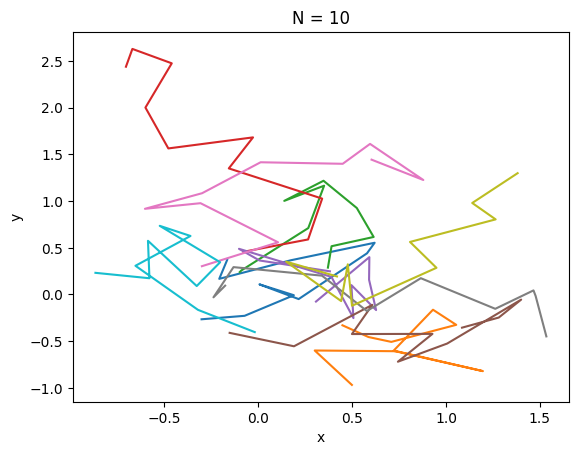

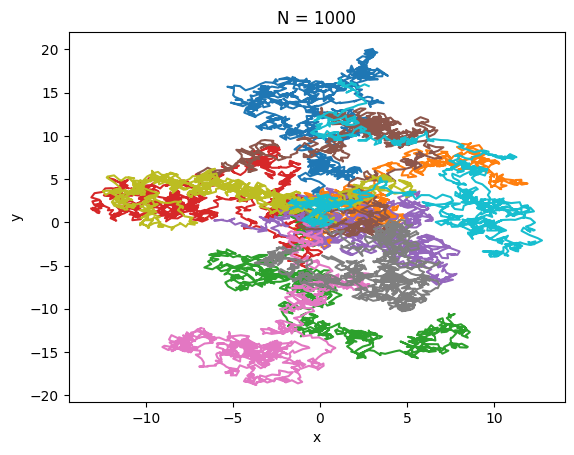

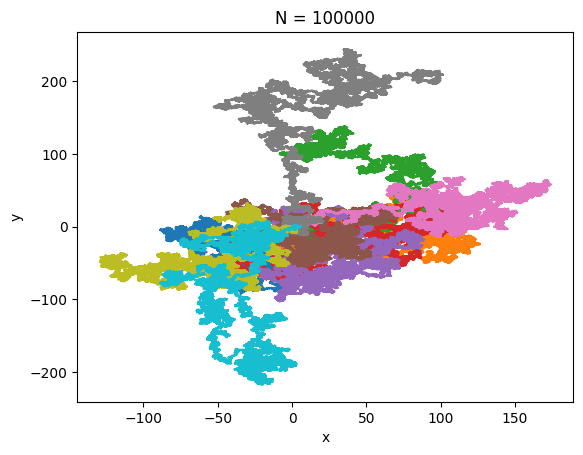

In [3]:
number_different_walks = 10

for N in [10,1000,100000]:
  plt.title("N = " + str(N))
  for i in range(number_different_walks):
    result = random_walk(N,2)
    x = result[1][:, 0]
    y = result[1][:, 1]
    plt.plot(x, y)
    plt.ylabel("y")
    plt.xlabel("x")
  plt.show()

**Does multiplying the number of steps by one hundred roughly increase
the net distance by ten?**






In [4]:
from math import*

def calculate_endpoint_and_distance(random_walk_array):#calculate endpoint and net distance of a random walk

  endpoint = random_walk_array[random_walk_array.shape[0]-1]

  distance = 0
  for i in range(len(endpoint)):
    distance = distance + endpoint[i]**2

  distance = sqrt(distance)

  return(endpoint,distance)


def calculate_mean_distance(N,d,M): #calculate mean distance of random walk with: N is number of steps; d is dimension of random walk; M number of repetitions
  mean = []
  for i in range(M):
    mean.append(calculate_endpoint_and_distance(random_walk(N,d)[1])[1])

  mean = np.sum(mean)/len(mean)

  return(mean)



In [5]:
print("For N = 10 the mean net distance is " + str(round(calculate_mean_distance(10,1,50),2)))
print("For N = 1000 the mean net distance is " + str(round(calculate_mean_distance(1000,1,50),2)))
print("For N = 100000 the mean net distance is " + str(round(calculate_mean_distance(100000,1,50),2)))


For N = 10 the mean net distance is 0.68
For N = 1000 the mean net distance is 6.66
For N = 100000 the mean net distance is 71.71


As you can see in the calculations for an increase of the number of steps by a factor of 100 the net distance increases by a factor of nearly 10.

This can be explained by:

Root mean square displacement: $ RMS = \sqrt{<distance^2>} = \sqrt{N} $, with the number of steps N.


https://galileo.phys.virginia.edu/classes/152.mf1i.spring02/RandomWalk.htm

## 2.
**Write a routine to calculate the endpoints of W random walks with N
steps each in d dimensions**

In [6]:
def calculate_endpoints(N,d,W):
  endpoints = []

  for w in range(W):
    endpoints.append(calculate_endpoint_and_distance(random_walk(N,d)[1])[0])

  return(endpoints)

calculate_endpoints(10,4,6)

[array([-0.90256267, -2.20934038, -1.92191291,  0.94178784]),
 array([ 1.35771335, -1.60728208,  0.53981654, -0.87085005]),
 array([-0.78957504, -0.24951464, -0.61441937, -0.03894535]),
 array([0.21511877, 0.81743941, 0.90779804, 0.55319077]),
 array([ 1.05012914, -0.47481639,  0.15133662,  1.23875475]),
 array([-0.35881511,  0.44574543, -1.50830348, -0.48615296])]

* *Helper function, to get a row of the array:*

In [7]:
def extract_nth_row(M,n): #extract nth-1 row of matrix M (because python is strange)
  row = []
  for item in M:
    row.append(item[n])
  return(row)

M = random_walk(6,5)[1]
print(M)
print(M[0])
print(M[:][0])
print(M[:,0])
print(M.transpose()[0])
print(extract_nth_row(M,0))

[[ 0.13290372  0.28658353 -0.39568521  0.13072195 -0.1287669 ]
 [ 0.05243023 -0.12947297 -0.17039757 -0.29311244 -0.30623652]
 [-0.09539302 -0.14710391  0.2975332  -0.74567442  0.13885601]
 [-0.12843326 -0.01785511  0.30238796 -0.65300513 -0.10565978]
 [-0.28592347  0.20550595  0.20512023 -1.11270648 -0.39152986]
 [-0.55167486 -0.28835012 -0.1484567  -1.54513134  0.06181172]]
[ 0.13290372  0.28658353 -0.39568521  0.13072195 -0.1287669 ]
[ 0.13290372  0.28658353 -0.39568521  0.13072195 -0.1287669 ]
[ 0.13290372  0.05243023 -0.09539302 -0.12843326 -0.28592347 -0.55167486]
[ 0.13290372  0.05243023 -0.09539302 -0.12843326 -0.28592347 -0.55167486]
[0.13290372077424284, 0.05243023019414772, -0.09539302027989305, -0.1284332623937937, -0.28592347291698894, -0.5516748633086681]


**Do a scatter plot of the endpoints of $10000$
random walks with $N = 1$ and $N = 10$, superimposed on the same plot.**


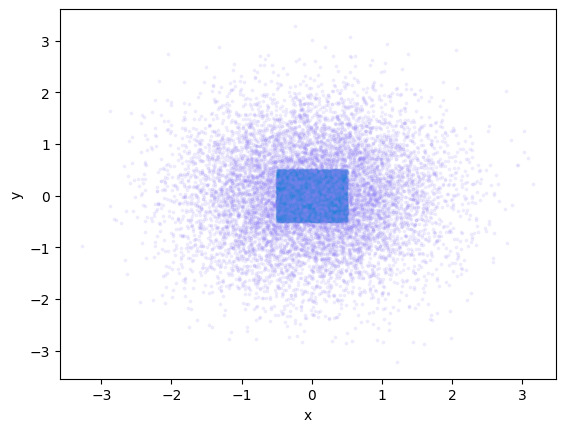

In [8]:
from random import random

for N in [1,10]:
    endpoints = calculate_endpoints(N,2,10000)
    plt.scatter(extract_nth_row(endpoints,0), extract_nth_row(endpoints,1),s=3,color = [random(),0.5,random(),0.1])
    plt.ylabel("y")
    plt.xlabel("x")
plt.show()

## 3.
**Calculate the RMS step-size a for one-dimensional steps uniformly
distributed in (1/2, 1/2).**

RMS = Root Mean Square

Analytisch:
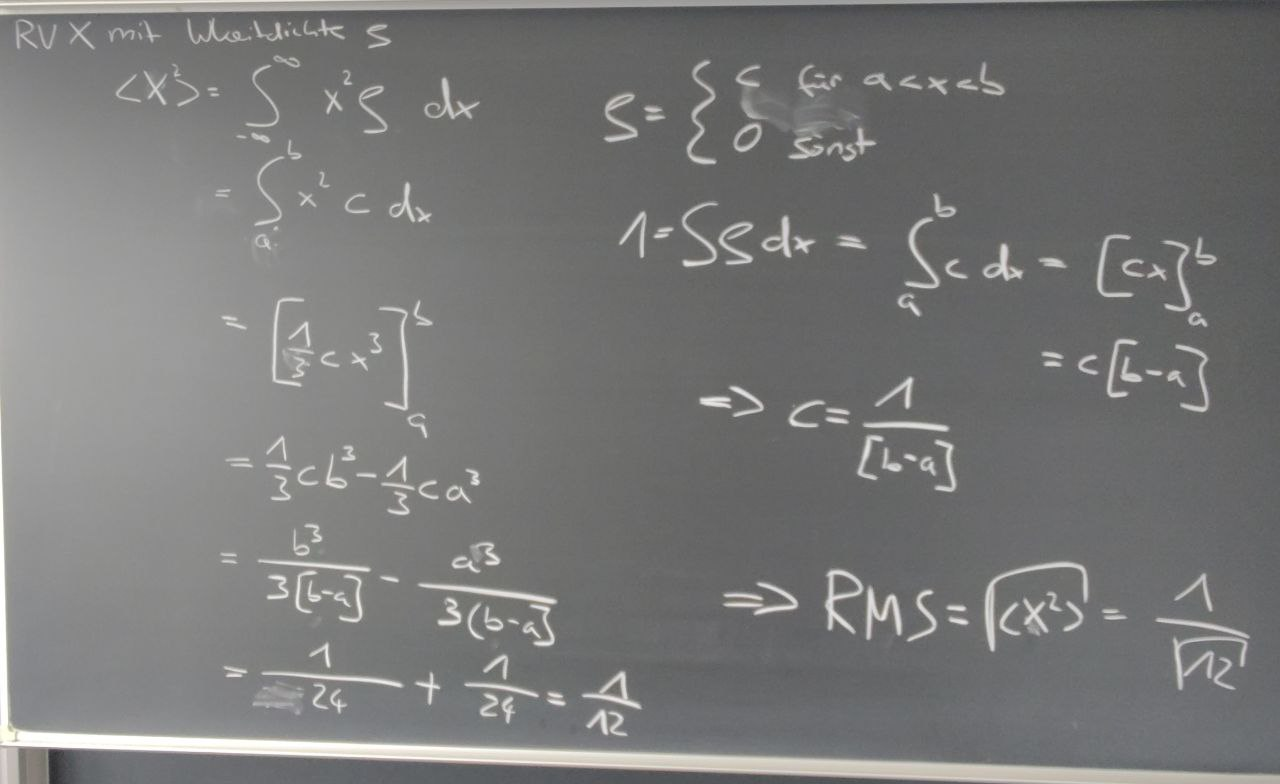

$\sqrt(1/12) ≈ 0.289$

Numerisch:

In [9]:
def calc_RMS(n):

  r = np.random.uniform(-1/2,1/2,n)

  rms = np.sqrt(np.mean(r**2))

  return rms

print("RMS step-size =",calc_RMS(100000))

RMS step-size = 0.2883751298731139


**Write a routine that plots a histogram of
the endpoints of W one-dimensional random walks with N steps and
50 bins, along with the prediction of eqn (1), for x in (3s, 3s).**

**Do a histogram with W = 10000 and N = 1, 2, 3, and 5.**

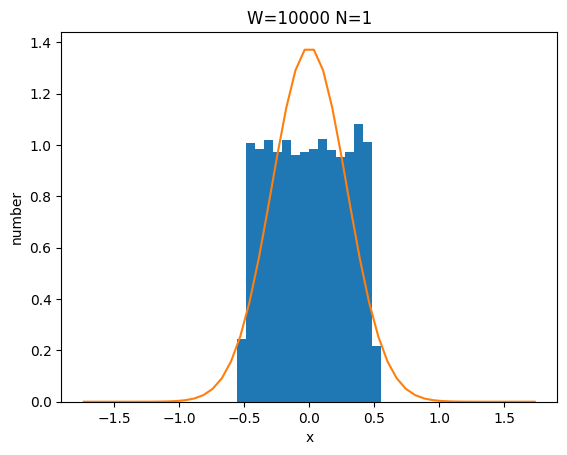

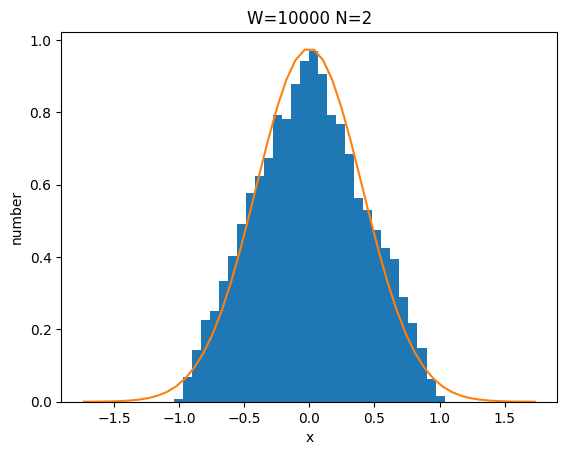

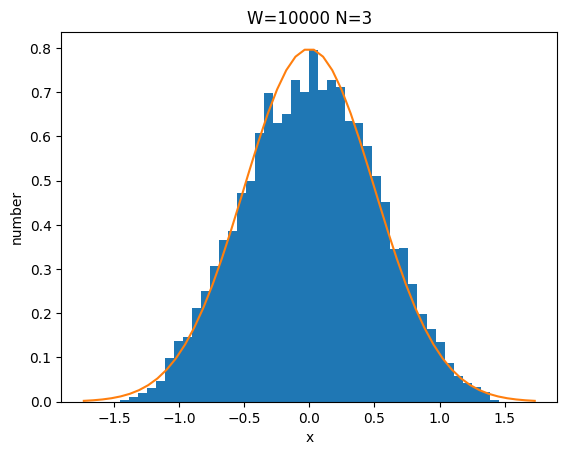

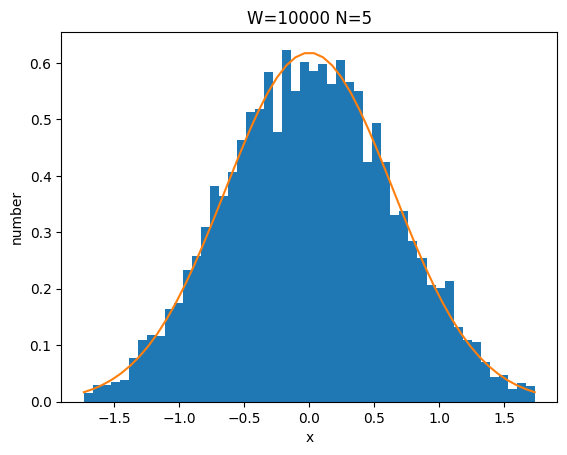

In [10]:
import matplotlib.pyplot as plt
import random as rand
import numpy as np
import math

def plot_hist_gauss(N,W,bins = 50):
    rms = calc_RMS(100000)
    a = 1/math.sqrt(12)
    x=np.linspace(-rms*6,rms*6)
    sig = math.sqrt(N)*a
    mu = 0
    y=1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

    rng = np.asarray(calculate_endpoints(N,1,W))
    plt.hist(rng, range=(-rms*6,rms*6), bins=50, density=True)
    plt.plot(x,y)
    plt.title("W="+str(W)+" N="+str(N))
    
    plt.ylabel("number")
    plt.xlabel("x")
    plt.show()

plot_hist_gauss(1,10000)
plot_hist_gauss(2,10000)
plot_hist_gauss(3,10000)
plot_hist_gauss(5,10000)

**How quickly does
the Gaussian distribution become a good approximation to the random
walk?**

It becomes a good approximation very quickly (N>=2) but for N equals 1 we only get uniform distributed results from -1/2 to +1/2.




## 4.
**Plot the price index versus time.**

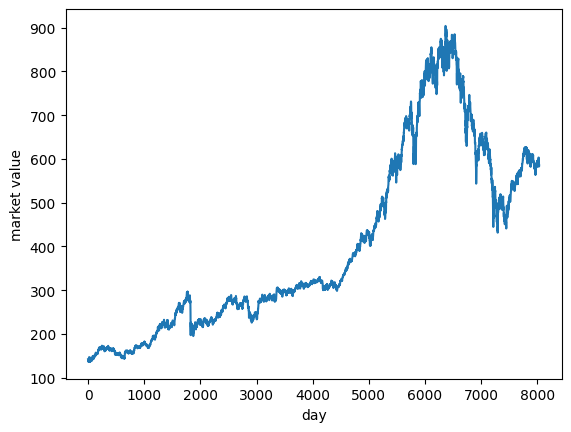

In [11]:
sp_file = open("SandPConstantDollars.dat.txt", "r")

data = []
x = []
y = []
count = 0

for line in sp_file:
    d = line.split(" ")

    if len(d) > 1:
      time = d[0]
      price = d[1]
      x.append(int(time))
      y.append(float(price))
      data.append((int(time), float(price)))
      count += 1
      #if count > 100:
      #  break


sp_file.close()
plt.ylabel('market value')
plt.xlabel('day')
plt.plot(x,y)

**On September 11, 2001 the World Trade Center was attacked (day number 6,903 in the list). Does it seem that the drop in the stock-market after
2000 is due mostly to this external event?**

It seems that the drop after September 11 (around 7200) was not triggered by the attack, as there was already a downward trend in the market before. Overall, the market is dominated by the dotcom bubble.


## 5.
**Write a function that finds all pairs of time points from our data file
separated by a time interval Dt = l and returns a list of per cent changes. Plot a histogram of the daily changes, the weekly
changes, and the yearly changes.**

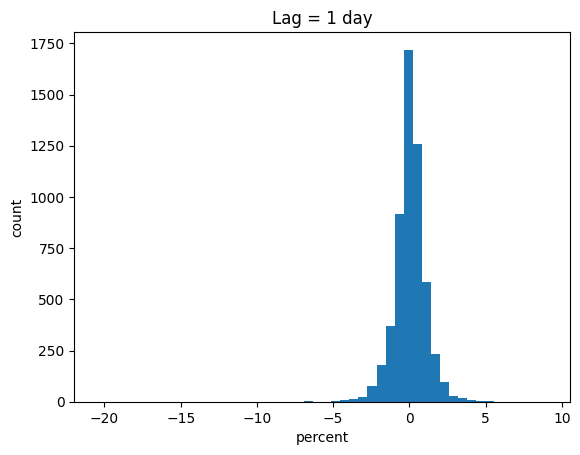

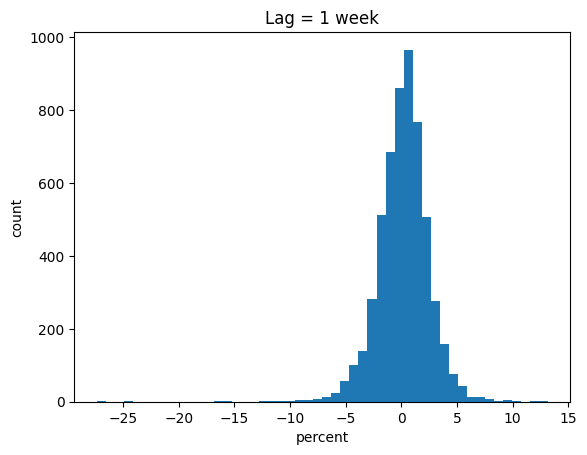

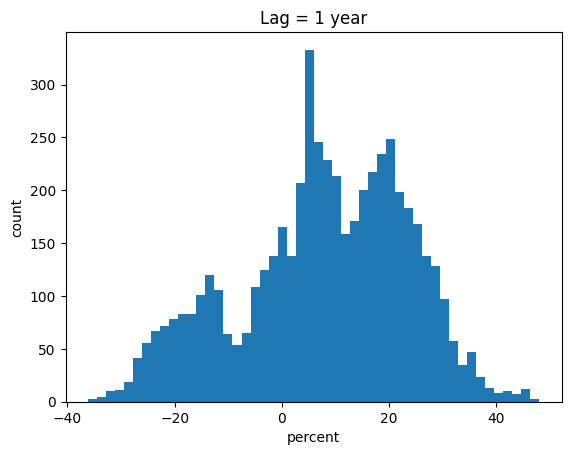

In [12]:
def find_pairs(data,l):
  lst = []
  for i in range(len(data)-l):
    lst.append(100*(data[i+l][1]-data[i][1])/data[i][1])
    #for j in range(i+1,len(data)):
    # if data[j][0] == data[i][0]+l:
    #    lst.append(100*(data[j][1]-data[i][1])/data[i][1])
  return(lst)

plt.hist(find_pairs(data,1),bins=50)
plt.title('Lag = 1 day')
plt.ylabel('count')
plt.xlabel('percent')
plt.show()
plt.hist(find_pairs(data,5),bins=50)
plt.title('Lag = 1 week')
plt.ylabel('count')
plt.xlabel('percent')
plt.show()
plt.hist(find_pairs(data,252),bins=50)
plt.title('Lag = 1 year')
plt.ylabel('count')
plt.xlabel('percent')
plt.show()


**Which of the three represents a reasonable time for you to stay invested in the Standard and Poor’s index
(during which you have mean percentage growth larger than a tiny fraction of the fluctuations)?**

It makes sense to invest in the Standard and Poor index on an annual scale. For the other two time scales, the distribution is symmetrical around 0. The distribution on the annual scale is shifted towards positive returns.




**Also, why do you think the yearly changes look
so much more complicated than the other distributions?**

The development within a year depends primarily on larger external events. These do not follow the Central Limit Theorem, as there are not enough major events within a year. As a result, the data here are not normally distributed.
In addition, the stock value rises continuously. This increase is too small, to recognise it at the daily or weekly level. The smaller fluctuations dominate here.


## 6.
**Show that the logarithm of a Gaussian is an inverted parabola.**

Text(0.5, 0, 'percent')

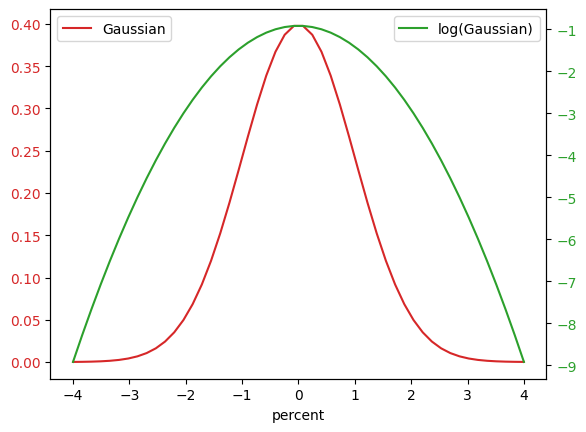

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-4,4)
y1=1./(np.sqrt(2.*np.pi))*np.exp(-np.power(x, 2.)/2)
y2=np.log(y1)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(x, y1, color = color,label='Gaussian')
ax1.tick_params(axis ='y', labelcolor = color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

color = 'tab:green'
ax2.plot(x, y2, color = color,label='log(Gaussian)')
ax2.tick_params(axis ='y', labelcolor = color)
ax2.legend(loc='upper right')

ax1.set_xlabel('percent')



**Plot the
logarithm of the histogram of the weekly percentage changes from part 5.**

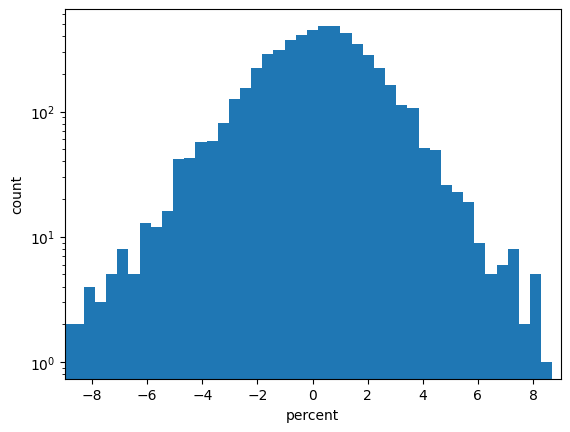

In [14]:
hist_data = plt.hist(find_pairs(data,5),bins=100)
plt.yscale('log')
plt.xlim([-9, 9])
plt.ylabel('count')
plt.xlabel('percent')
plt.show()

**Are there more large percentage changes than expected from a Gaussian distribution (fat tails) or fewer?**

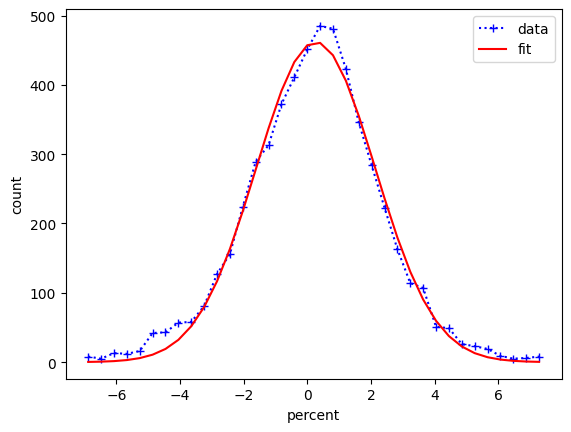

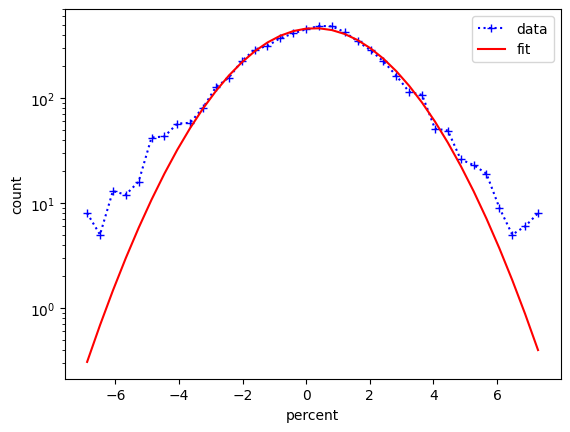

In [15]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np


#get y and x data from histrogram
y_all = hist_data[0]
x_all = []
for i in range(0,len(hist_data[1])-1):
  x_all.append(hist_data[1][i] + (hist_data[1][i+1]-hist_data[1][i])/2)
y = np.array(y_all[50:86])
x = np.array(x_all[50:86])


#fit gaussian to data
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])


#lin-lin plot
plt.plot(x, y, 'b+:', label='data')
plt.plot(x, Gauss(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('')
plt.xlabel('percent')
plt.ylabel('count')
plt.show()


#log-lin plot
plt.plot(x, y, 'b+:', label='data')
plt.plot(x, Gauss(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('')
plt.xlabel('percent')
plt.ylabel('count')
plt.yscale('log')
plt.show()

We can see, that there are fat tails: there are more large percent changes then expected for a gaussian distribution.

## 7.
**Calculate the daily volatility, the weekly volatility, and the monthly
volatility of the inflation-corrected Standard and Poor’s 500 data. Plot
the volatility as a function of lag, and the volatility squared as a  function of lag, for lags from zero to 100 days.**

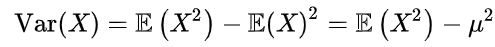

In [16]:
def calculate_volatility(lst): #alternativ: np.var(lst)
  volality = np.sqrt(np.sum(np.power(lst,2))/len(lst) - np.power(np.mean(lst),2))
  return volality

In [17]:
print("volatility of 1 day:",calculate_volatility(find_pairs(data,1)))
print("volatility of 1 week:",calculate_volatility(find_pairs(data,5)))
print("volatility of 1 month:",calculate_volatility(find_pairs(data,21)))
print("volatility of 1 year:",calculate_volatility(find_pairs(data,252)))

volatility of 1 day: 1.0606483448236002
volatility of 1 week: 2.2917494213535674
volatility of 1 month: 4.4048356041086
volatility of 1 year: 15.72343902607511


**Plot the volatility as a function of lag, and the volatility squared as a function of lag, for lags from zero to 100 days.**

Berechne...: 100%|██████████████████████████████████████████████████████████████████| 999/999 [00:01<00:00, 600.73it/s]


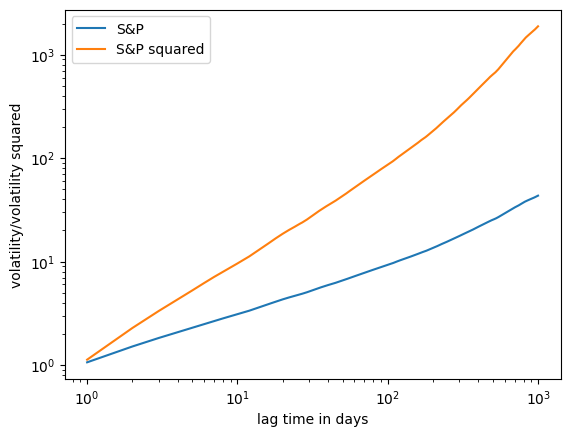

In [18]:
from tqdm import tqdm

volatility_list = []
time_list = []
for t in tqdm (range(1,1000,1), desc="Berechne..."):
  time_list.append(t)
  volatility_list.append(calculate_volatility(find_pairs(data,t)))

plt.plot(time_list,volatility_list,label='S&P')
plt.plot(time_list,np.power(volatility_list,2),label='S&P squared')
plt.ylabel('volatility/volatility squared')
plt.xlabel('lag time in days')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

**Does it behave as a random walk should?**

In a period of 100 days, volatility behaves like a random walk. This is also confirmed by the analysis for lags of 1 and 7 days from task 5. There you can see Gaussian curves centered around 0. For longer periods (> 100 days), the volatility does not behave like a random walk. See also task 5 (1 year lag), where the distribution is no longer a simple Gaussian curve, but a distribution with several peaks.

In the following we will compare the financial data with data from a random walk. For this we will plot them against each other.

Berechne...: 100%|██████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 677.64it/s]


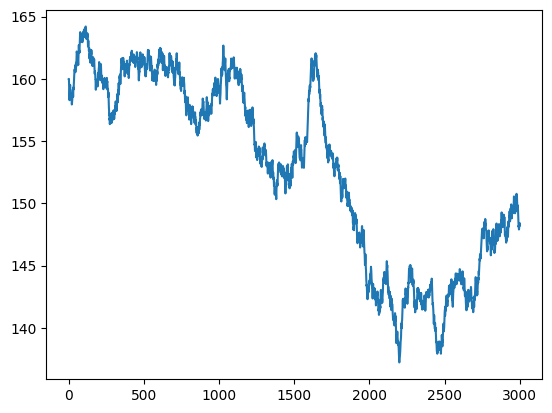

In [19]:
rw_data_temp = random_walk(3000,1,0.5,160)
rw_data_temp = extract_nth_row(rw_data_temp[1],0)
rw_data = []
for i in range(0,len(rw_data_temp)):
  rw_data.append((i,rw_data_temp[i]))

rw_volatility_list = []
rw_time_list = []

for t in tqdm (range(1,1000,2), desc="Berechne..."):
  rw_time_list.append(t)
  rw_volatility_list.append(calculate_volatility(find_pairs(rw_data,t)))

plt.plot(extract_nth_row(rw_data,0),extract_nth_row(rw_data,1))


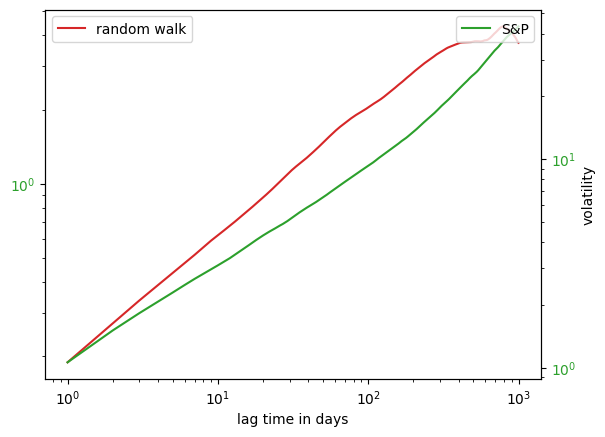

In [20]:
fig, ax1 = plt.subplots()


ax1.plot(rw_time_list,rw_volatility_list, color = 'tab:red', label='random walk')
ax1.tick_params(axis ='y', labelcolor = color)
ax1.legend(loc='upper left')


ax1.set_yscale('log')
ax1.set_xscale('log')

ax2 = ax1.twinx()

ax2.plot(time_list,volatility_list, color = 'tab:green', label='S&P')
ax2.tick_params(axis ='y', labelcolor = color)
ax2.legend(loc='upper right')

ax1.set_xlabel('lag time in days')
ax2.set_ylabel('volatility')
ax2.set_yscale('log')
ax2.set_xscale('log')

plt.show()

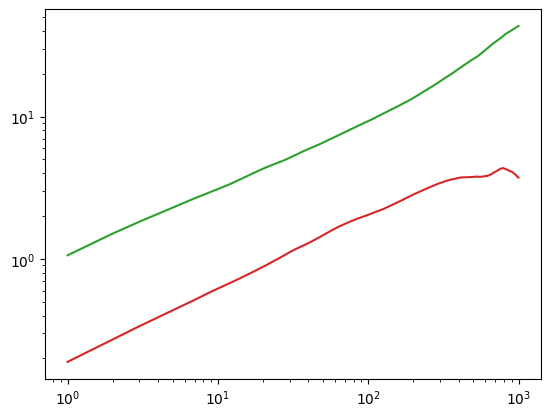

In [27]:
plt.figure()

plt.plot(rw_time_list,rw_volatility_list, color = 'tab:red', label='random walk')
plt.plot(time_list,volatility_list, color = 'tab:green', label='S&P')

plt.yscale('log')
plt.xscale('log')

For a random walk we expect a straight line with an increase of one for the volatility/mean square displacement in the log/log plot, which would indicate a normal diffusion (random walk data is plottet in red).

From this graph we can see, that the finance data do not fullfil this expectations. Here we can guess 2 regimes (one subdiffusive and one superdiffusive).

(for more information about the comparison of random walks and finance data: https://www.cannonfinancial.com/uploads/main/walk1.pdf)


## 8.
**Suppose these five hundred stocks had mean annual percentage returns
$m_i$ and each had mean volatility $s_i$. Suppose they were equally weighted
in the index, and their fluctuations were uncorrelated. What would the
return and volatility for the index be?**

\\
**For an index with 500 equally weighted stocks:** \\
The return is $m_I =\frac{1}{500} ∑_{i=1}^{500} m_i = m$, if $m_i = m$ for all $i$

The volatility is $s_I = (\frac{1}{500})^2 ∑_{i=1}^{500} s_i = \frac{1}{500} s$, if $s_i = s$ for all $i$


**For only one stock of the index:** \\
The return is $m$

The volatility is $s$



(Follows from Satz 9.1.8, 9.2.18
https://www.uni-ulm.de/fileadmin/website_uni_ulm/mawi.inst.110/lehre/ws12/WR/Skript_9.pdf)

**Without inside information or insight as to which stocks will have higher mean returns, is the expected
return for the index bigger than the average return for buying individual
stocks?**

The mean return ist for both the same.

 **Which strategy has lower volatility?**

The volatility is smaller for the index. So investing in the index is safer, because the variation of the trading price is lower.
